In [265]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


# Setup


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs


# Sigmoid Neuron ( Using S.E.L/ MSE loss and C.E.L both)

In [2]:
class SigmoidNeuron:
    def __init__(self):
        self.w=None
        self.b=None
        
    def perceptron(self,x):
        return np.dot(x,self.w.T)+self.b
    
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))
    
    def grad_w_mse(self,x,y):
        y_pred=self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)*x
    
    def grad_b_mse(self,x,y):
        y_pred=self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)
    
    def grad_w_cel(self,x,y):                            #Gradient of W has been calaculated by following the Cross entropy Loss minimization technique
        y_pred=self.sigmoid(self.perceptron(x))
        return (y_pred-y)*x

    def grad_b_cel(self,x,y):                            #Gradient of b has been calaculated by following the Cross entropy Loss minimization technique
        y_pred=self.sigmoid(self.perceptron(x))
        return (y_pred-y)
    
    def fit(self, X,Y,epoch,learning_rate=1,initialize=True,loss_fn='mse',display_loss=True):
        #initialize w,b
        if initialize:
            self.w=np.random.randn(1, X.shape[1])
            self.b=0
        if display_loss:
            loss=[]
        m=X.shape[1]
        for i in tqdm_notebook(range(epoch),total=epoch,unit='epoch'):
            dw=0
            db=0
        
            for x,y in zip(X,Y):
                if loss_fn=='mse':
                    dw+=self.grad_w_mse(x,y)
                    db+=self.grad_b_mse(x,y)

                elif loss_fn=='cel':
                    dw+=self.grad_w_cel(x,y)
                    db+=self.grad_b_cel(x,y)

            self.w-=learning_rate*dw/m
            self.b-=learning_rate*db/m                                  #Dividing by m so that the learning rate is normalised
                                                                        # to be very small in case of large data 
            if display_loss:
                Y_pred=self.sigmoid(self.perceptron(x))
                if loss_fn=='mse':
                    loss.append(mean_squared_error(Y_pred,[y]))
                elif loss_fn=='cel':
                    loss.append(log_loss(Y,Y_pred))
                
        
        if display_loss:
            plt.plot(loss)
            plt.xlabel('Epochs')
            if loss_fn=='mse':
                 plt.ylabel('Mean Squared Error')
            elif loss_fn=='cel':
                plt.ylabel('Cross Entropy Loss')
            plt.show()
            
    def predict(self,X):
        Y_pred=[]
        for x in X:
            y_pred=self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.asarray(Y_pred)
        

In [3]:
my_cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

# Generate Data ( For Multi-class and Binary Classification)

In [4]:
#from sklearn.datasets import make_blobs
data, labels= make_blobs(n_samples=1000,n_features=2,centers=4, random_state=0)
print(data.shape,labels.shape)

(1000, 2) (1000,)


In [5]:
data,labels

(array([[-2.50804312,  7.86408052],
        [ 0.4666179 ,  3.86571303],
        [-2.94062621,  8.56480636],
        ...,
        [-1.13551783,  8.49272771],
        [-1.22933367,  7.75342586],
        [ 3.90485877,  0.683497  ]]),
 array([3, 0, 3, 2, 1, 0, 0, 1, 0, 0, 3, 1, 2, 3, 1, 2, 2, 3, 0, 1, 0, 3,
        1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 3, 2, 3, 0, 3, 0, 2, 2, 0, 0, 0, 2,
        3, 0, 0, 3, 2, 0, 1, 0, 0, 2, 3, 1, 0, 0, 3, 3, 1, 1, 2, 2, 2, 3,
        0, 2, 3, 3, 3, 3, 3, 2, 0, 3, 0, 3, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0,
        2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 3, 2, 1,
        0, 0, 2, 3, 2, 2, 0, 2, 1, 1, 1, 3, 2, 2, 0, 1, 0, 3, 2, 1, 1, 0,
        2, 0, 0, 0, 2, 0, 1, 3, 1, 3, 1, 0, 3, 3, 1, 0, 3, 3, 1, 0, 0, 0,
        2, 0, 0, 0, 1, 2, 3, 1, 0, 0, 0, 0, 3, 3, 0, 1, 2, 1, 1, 1, 2, 1,
        2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 2, 1, 3, 2, 0, 1, 1, 2, 3, 2, 3,
        2, 2, 2, 0, 3, 3, 1, 1, 2, 0, 3, 0, 3, 2, 0, 3, 2, 0, 0, 1, 1, 3,
        0, 0, 0, 3, 0, 0, 0, 

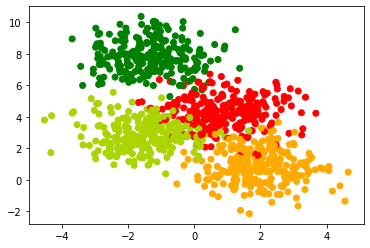

In [6]:
plt.scatter(data[:,0], data[:,1],c=labels,cmap=my_cmap)

In [7]:
labels_orig=labels[:]
labels=np.mod(labels_orig,2)                 # Binarising the labels
labels


array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,

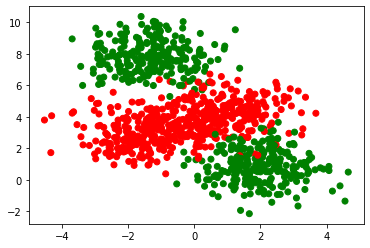

In [8]:
plt.scatter(data[:,0], data[:,1],c=labels,cmap=my_cmap)

In [9]:
X_train,X_val,Y_train,Y_val=train_test_split(data,labels,stratify=labels,random_state=0)
print(X_train.shape,X_val.shape,Y_train.shape)

(750, 2) (250, 2) (750,)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


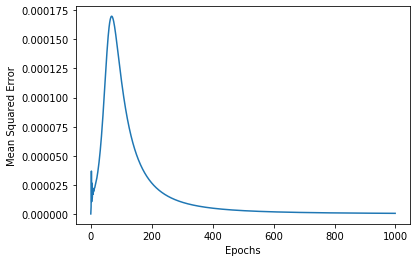

In [10]:
sn=SigmoidNeuron()
sn.fit(X_train,Y_train,1000,learning_rate=0.1,initialize=True,loss_fn='mse',display_loss=True)

In [11]:
Y_pred_train=sn.predict(X_train)

In [12]:
Y_pred_train_binarised=(Y_pred_train>=0.5).astype("int").ravel()
Y_pred_train_binarised

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [13]:
Y_pred_val=sn.predict(X_val)
Y_pred_val_binarised=(Y_pred_val>=0.5).astype(int).ravel()


In [14]:
train_accuracy=accuracy_score(Y_pred_train_binarised,Y_train)
test_accuracy=accuracy_score(Y_pred_val_binarised,Y_val)

train_accuracy,test_accuracy

(0.7346666666666667, 0.716)

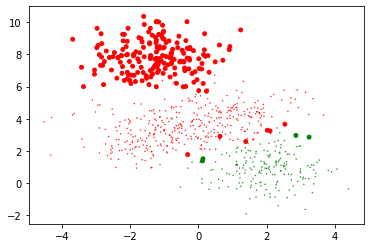

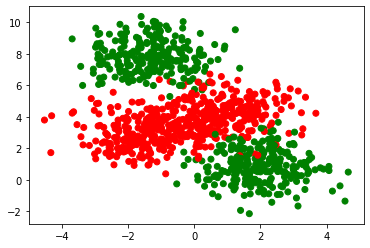

In [15]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_pred_train_binarised,cmap=my_cmap,s=15*np.abs(Y_pred_train_binarised-Y_train)+0.2)
plt.show()
plt.scatter(data[:,0], data[:,1],c=labels,cmap=my_cmap)

plt.show()

As seen since the data was not linearly seperable...the sigmoid neuron struggles to classify the data correctly.....
Large dots indicate that the prediction is wrong.
Although the neuron could draw a boundry between the two classes

# My First Feed Forward Network!

In [16]:
class FFNetwork:
    def __init__(self):
        self.w1=np.random.randn()
        self.w2=np.random.randn()
        self.w3=np.random.randn()
        self.w4=np.random.randn()
        self.w5=np.random.randn()
        self.w6=np.random.randn()
        self.b1=0
        self.b2=0
        self.b3=0
    
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))
    
    def forward_pass(self,x):
        self.x1,self.x2=x
        self.a1=self.w1*self.x1+self.w2*self.x2 +self.b1
        self.h1=self.sigmoid(self.a1)
        self.a2=self.w3*self.x1 + self.w4*self.x2 + slf.b2
        self.h2=self.sigmoid(self.a2)
        self.a3=self.h1*self.w5+self.h2*self.w6+self.b3
        self.h3=self.sigmoid(self.a3)    
        return self.h3
    
    def grad(self,x,y):
        self.forward_pass(x)
        self.dw5= (self.h3-y) * self.h3*(1-self.h3) * self.h1
        self.dw6= (self.h3-y) * self.h3*(1-self.h3) * self.h2
        self.db3= (self.h3-y) * self.h3*(1-self.h3)
        
        self.dw1= (self.h3-y) * self.h3*(1-self.h3) * self.w5 *self.h1* (1-self.h1) * self.x1
        self.dw2= (self.h3-y) * self.h3*(1-self.h3) * self.w5 *self.h1* (1-self.h1) * self.x2
        self.db1= (self.h3-y) * self.h3*(1-self.h3) * self.w5 *self.h1* (1-self.h1) 
        
        self.dw3= (self.h3-y) * self.h3*(1-self.h3) * self.w6 *self.h2*(1-self.h2) * self.x1
        self.dw4= (self.h3-y) * self.h3*(1-self.h3) * self.w6 *self.h2*(1-self.h2) * self.x2
        self.db2= (self.h3-y) * self.h3*(1-self.h3) * self.w6 *self.h2*(1-self.h2) 
        
        
    
    def fit(self, X,Y, epochs=1, learning_rate=1, initialize='True', display_loss=True):
       
        if initialize:
            self.w1=np.random.randn()
            self.w2=np.random.randn()
            self.w3=np.random.randn()
            self.w4=np.random.randn()
            self.w5=np.random.randn()
            self.w6=np.random.randn()
            self.b1=0
            self.b2=0
            self.b3=0
            
        if display_loss:
            loss={}
        
       
        for i in tqdm_notebook(range(epoch),total=epochs,unit='epoch'):
            dw1,dw2,dw3,dw4,dw5,dw6,db1,db2,db3=[0]*9
            
            for x,y in zip(X,Y):
                self.grad(x,y)
                dw1+=self.dw1
                dw2+=self.dw2
                dw3+=self.dw3
                dw4+=self.dw4
                dw5+=self.dw5
                dw6+=self.dw6
                db1+=self.db1
                db2+=self.db2
                db3+=self.db3
                
            m=X.shape[1]
            self.w1-=learning_rate* dw1 /m
            self.w2-=learning_rate* dw2 /m
            self.w3-=learning_rate* dw3 /m
            self.w4-=learning_rate* dw4 /m
            self.w5-=learning_rate* dw5 /m
            self.w6-=learning_rate* dw6 /m
            self.b1-=learning_rate* db1 /m
            self.b2-=learning_rate* db2 /m
            self.b3-=learning_rate* db3 /m
            
         
            if display_loss:
                Y_pred=self.predict(X)
                loss[i]=mean_squared_error(Y_pred,Y)
                
                
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epinitialiseochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
            
    def predict(self,X):
        Y_pred=[]
        for x in X:
            Y_pred=self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.asarray(Y_pred)
        
        


In [17]:
ffn=FirstFFNetwork()
initialise=True

NameError: name 'FirstFFNetwork' is not defined

In [ ]:
ffn.fit(X_train,Y_train, epochs=1, learning_rate=0.1,initialize=True,display_loss=True)

# Generic Feed Forward Sigmoid Neuron Network

# FFN for Binary Classification

In [ ]:
class FFSNNetwork_bin:
    def __init__(self, n_inputs, hidden_sizes=[2]):
        self.nx = n_inputs
        self.ny = 1
        self.nh = len(hidden_sizes)
        self.sizes = [self.nx] + hidden_sizes + [self.ny]

        self.W = {}
        self.B = {}
        for i in range(self.nh+1):
          self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
          self.B[i+1] = np.zeros((1, self.sizes[i+1]))
    
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))
    
    
    
    def forward_pass(self,x):
        #Setting H[0] as the input layer. Reshape helps us to flatten the values as 
                                                    # 1 row and (-1) as many columns as there are values  
        self.A = {}
        self.H = {}
        self.H[0] = x.reshape(1, -1)
        for i in range(self.nh+1):
          self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
          self.H[i+1] = self.sigmoid(self.A[i+1])
        return self.H[self.nh+1]


    def grad_sigmoid(self,x):
        return x*(1-x)
    
    def grad(self,x,y):
        self.forward_pass(x)
        self.dW = {}
        self.dB = {}
        self.dH = {}
        self.dA = {}
        L = self.nh + 1
        self.dA[L] = (self.H[L] - y)
        for k in range(L, 0, -1):
          self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
          self.dB[k] = self.dA[k]
          self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
          self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))

        
    def predict(self, X):
        Y_pred = []
        for x in X:
          y_pred = self.forward_pass(x)
          Y_pred.append(y_pred)
        return np.array(Y_pred).squeeze()

    def cross_entropy(self,label,pred):
        yl=np.multiply(pred,label)
        yl=yl[yl!=0]
        yl=-np.log(yl)
        yl=np.mean(yl)
        return yl
            
    def fit(self, X, Y, epochs=100, initialize='True', learning_rate=0.01, display_loss=True):

            if display_loss:
                  loss = []

            if initialize:
                  for i in range(self.nh+1):
                    self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
                    self.B[i+1] = np.zeros((1, self.sizes[i+1]))

            for epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
                  dW = {}
                  dB = {}
                  for i in range(self.nh+1):
                    dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
                    dB[i+1] = np.zeros((1, self.sizes[i+1]))
                    
                  for x, y in zip(X, Y):
                    self.grad(x, y)
                    for i in range(self.nh+1):
                      dW[i+1] += self.dW[i+1]
                      dB[i+1] += self.dB[i+1]

                  m = X.shape[1]
                  for i in range(self.nh+1):
                    self.W[i+1] -= learning_rate * (dW[i+1]/m)
                    self.B[i+1] -= learning_rate * (dB[i+1]/m)

                  if display_loss:
                    Y_pred = self.predict(X) 
                    loss.append(self.cross_entropy(Y, Y_pred))

            if display_loss:
              plt.plot(loss)
              plt.xlabel('Epochs')
              plt.ylabel('CE')
              plt.show()

 


In [ ]:
ffn_bin=FFSNNetwork_bin(2,[2,3])

In [ ]:
ffn_bin.fit(X_train, Y_train, epochs=1000, initialize='True', learning_rate=0.001, display_loss=True)

In [ ]:
Y_pred_train = ffn_bin.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn_bin.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))


In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_pred_binarised_train,cmap=my_cmap,s=15*np.abs(Y_pred_binarised_train-Y_train)+0.2)
plt.show()
plt.scatter(data[:,0], data[:,1],c=labels,cmap=my_cmap)

plt.show()

In [ ]:
from sklearn.datasets import make_blobs,make_moons
data, labels= make_moons(n_samples=1000,shuffle =True,noise=0.2,random_state=0)
print(data.shape,labels.shape)

In [ ]:
X_train,X_val,Y_train,Y_val=train_test_split(data,labels,stratify=labels,random_state=0)
print(X_train.shape,X_val.shape,Y_train.shape)

In [ ]:
plt.scatter(data[:,0], data[:,1],c=labels,cmap=my_cmap)

In [ ]:
ffn_bin=FFSNNetwork_bin(2,[2,3])
ffn_bin.fit(X_train, Y_train, epochs=1000, initialize='True', learning_rate=0.001, display_loss=True)
Y_pred_train = ffn_bin.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn_bin.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))


In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_pred_binarised_train,cmap=my_cmap,s=15*np.abs(Y_pred_binarised_train-Y_train)+0.2)
plt.show()
plt.scatter(data[:,0], data[:,1],c=labels,cmap=my_cmap)

plt.show()

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels_orig, stratify=labels_orig, random_state=0)
print(X_train.shape, X_val.shape, labels_orig.shape)

In [ ]:
FFSN_MultiClass(2,4,[2,3])

# FFN for Multi-class Classification 

In [ ]:
X_train.shape,Y_train.shape

In [ ]:
#from sklearn.datasets import make_blobs
data, labels= make_blobs(n_samples=1000,n_features=2,centers=4, random_state=0)
print(data.shape,labels.shape)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels_orig, stratify=labels_orig, random_state=0)
print(X_train.shape, X_val.shape, labels_orig.shape)

In [ ]:
plt.scatter(data[:,0], data[:,1],c=labels,cmap=my_cmap)

plt.show()

In [ ]:
class FFSN_MultiClass:
  
  def __init__(self, n_inputs, n_outputs, hidden_sizes=[3]):
    self.nx = n_inputs
    self.ny = n_outputs
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny] 

    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def softmax(self, x):
    exps = np.exp(x)
    return exps / np.sum(exps)

  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    self.A[self.nh+1] = np.matmul(self.H[self.nh], self.W[self.nh+1]) + self.B[self.nh+1]
    self.H[self.nh+1] = self.softmax(self.A[self.nh+1])
    return self.H[self.nh+1]
  
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()
 
  def grad_sigmoid(self, x):
    return x*(1-x) 
  
  def cross_entropy(self,label,pred):
    yl=np.multiply(pred,label)
    yl=yl[yl!=0]
    yl=-np.log(yl)
    yl=np.mean(yl)
    return yl
 
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1])) 
    
  def fit(self, X, Y, epochs=100, initialize='True', learning_rate=0.01, display_loss=False):
      
    if display_loss:
      loss = []
      
    if initialize:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
        
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
                  
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * (dW[i+1]/m)
        self.B[i+1] -= learning_rate * (dB[i+1]/m)
        
      if display_loss:
        Y_pred = self.predict(X) 
        loss.append(self.cross_entropy(Y, Y_pred))
    
    if display_loss:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('CE')
      plt.show()

In [ ]:
enc = OneHotEncoder()
#0 -> (1, 0, 0, 0)
#1 -> (0, 1, 0, 0)
#2 -> (0, 0, 1, 0)
#3 -> (0, 0, 0, 1)

y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

In [ ]:
ffsn_multi = FFSN_MultiClass(2,4,[2,3])
ffsn_multi.fit(X_train,y_OH_train,epochs=2000,learning_rate=.005,display_loss=True)

In [ ]:
Y_pred_train = ffsn_multi.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train,1)

Y_pred_val = ffsn_multi.predict(X_val)
Y_pred_val = np.argmax(Y_pred_val,1)

accuracy_train = accuracy_score(Y_pred_train, Y_train)
accuracy_val = accuracy_score(Y_pred_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))
plt.show()
plt.scatter(data[:,0], data[:,1],c=labels,cmap=my_cmap)

plt.show()